# TWITTER CYCBER BULLYING PROJECT

In [25]:
from pandas import *
from numpy import *
import matplotlib.pyplot as plt
import seaborn as sb

In [26]:
df = read_csv ('C:\\Users\\DELL\\Desktop\\cyberbullyingtweets\\cyberbullyingtweets.csv') #data taken from Kaggle
df.head ()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


# text processing

In [27]:
text_cleaning = '@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+'

In [28]:
!pip install wordcloud

In [117]:
import re
from wordcloud import STOPWORDS
text_cleaning = '@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"'
STOPWORDS.update (['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's'])

def lower (text):
    return text.lower ()
def remove_twitter (text):
    return re.sub (text_cleaning, ' ', text)
def remove_stop_words (text):
    return " ".join ([word for word in str(text).split() if word not in STOPWORDS])
def clean_text(text):
    text = lower (text)
    text = remove_twitter (text)
    text = remove_stop_words (text)
    return text
def sort_dict(x):
    l = sorted(x.items(), key =
             lambda kv:(kv[1], kv[0]))
    return l
def multiple_list (l):
    a, b = [], []
    for i in l:
        for j in range (0, len (i)):
            if j == 0: 
                a.append (i [j])
            elif j == 1: 
                b.append (i [j])
    return a, b

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = STOPWORDS).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [31]:
df['tweet_text']=df['tweet_text'].apply(clean_text)

In [32]:
import nltk
nltk.download ('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
from nltk.stem import WordNetLemmatizer
lematizer = WordNetLemmatizer ()

def lemmatizer_words (text):
    return " ".join ([lematizer.lemmatize (word) for word in text.split ()])
df['tweet_text']=df['tweet_text'].apply(lambda text: lemmatizer_words(text))

# different types of bullying

In [36]:
df.cyberbullying_type.unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

# gender based bullying

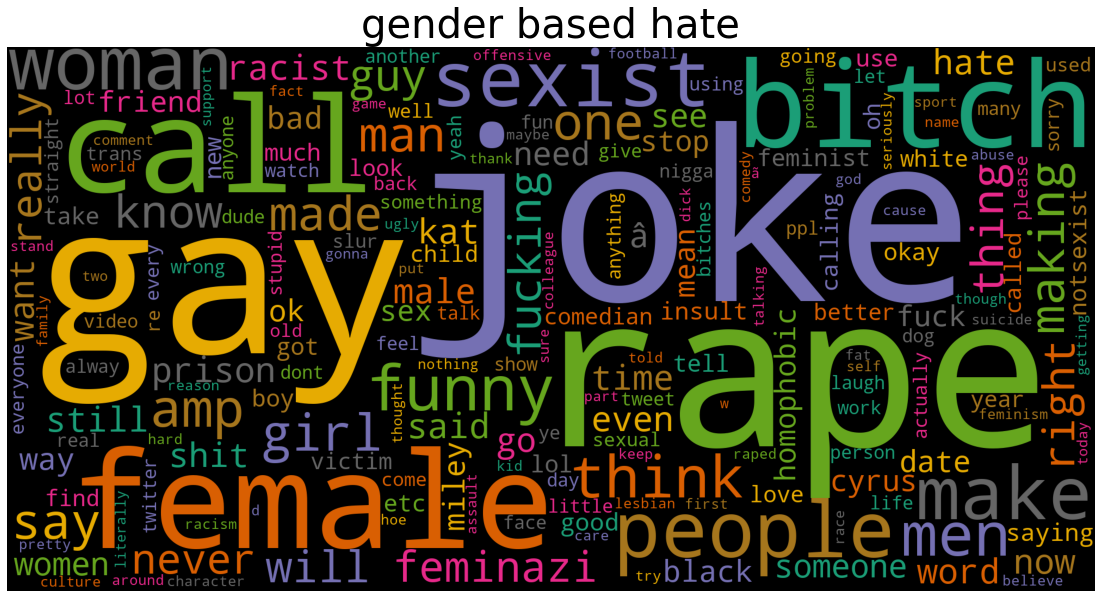

In [90]:
from wordcloud import WordCloud

plt.figure (figsize = (20, 10))
subset1 = df [df ['cyberbullying_type'] == 'gender']
text_gender = subset1.tweet_text.values
cloud1 = WordCloud (background_color = 'black', colormap = 'Dark2', 
                    collocations=False,width=2000,height=1000).generate(" ".join(text_gender))
plt.axis ('off')
plt.title ('gender based hate', fontsize = 40)
plt.imshow (cloud1)

# most used words and phrases

In [41]:
unigrams = get_top_n_gram(text_gender,(1,1),10)
bigrams = get_top_n_gram(text_gender,(2,2),10)

gender_1 = DataFrame(unigrams, columns = ['Text' , 'count'])
gender_1.groupby('Text').sum()['count'].sort_values(ascending=True)#.iplot(kind='bar', yTitle='Count', linecolor='black',color='black', title='Top 10 Unigrams',orientation='h')

gender_2 = DataFrame(bigrams, columns = ['Text' , 'count'])
gender_2.groupby('Text').sum()['count'].sort_values(ascending=True)#.iplot(kind='bar', yTitle='Count', linecolor='black',color='black', title='Top 10 Bigrams',orientation='h')

Text
call female     227
gay people      231
rape gay        244
gay jokes       256
joke gay        361
joke rape       373
gay rape        464
gay joke        550
rape jokes      601
rape joke      1664
Name: count, dtype: int64

In [42]:
unigrams

[('rape', 4302),
 ('joke', 4114),
 ('gay', 4067),
 ('jokes', 1265),
 ('call', 1114),
 ('bitch', 1067),
 ('female', 1060),
 ('people', 1009),
 ('sexist', 991),
 ('woman', 986)]

In [48]:
key, value = [], []
for i in unigrams:
    for j in range (0, len (i)):
        if j == 0:
            key.append (i [j])
        elif j == 1:
            value.append (i [j])

In [49]:
key

['rape',
 'joke',
 'gay',
 'jokes',
 'call',
 'bitch',
 'female',
 'people',
 'sexist',
 'woman']

In [50]:
value

[4302, 4114, 4067, 1265, 1114, 1067, 1060, 1009, 991, 986]

In [53]:
for i in sorted (dict_data.values ()):
    print (i, end = " ")

986 991 1009 1060 1067 1114 1265 4067 4114 4302 

In [59]:
l = sorted(dict_data.items(), key =
             lambda kv:(kv[1], kv[0])) 

In [56]:
key_data, value_data = [], []
for i in l:
    for j in range (0, len (i)):
        if j == 0:
            key_data.append (i [j])
        elif j == 1:
            value_data.append (i [j])
        

In [65]:
key

['woman',
 'sexist',
 'people',
 'female',
 'bitch',
 'call',
 'jokes',
 'gay',
 'joke',
 'rape']

In [66]:
value

[986, 991, 1009, 1060, 1067, 1114, 1265, 4067, 4114, 4302]

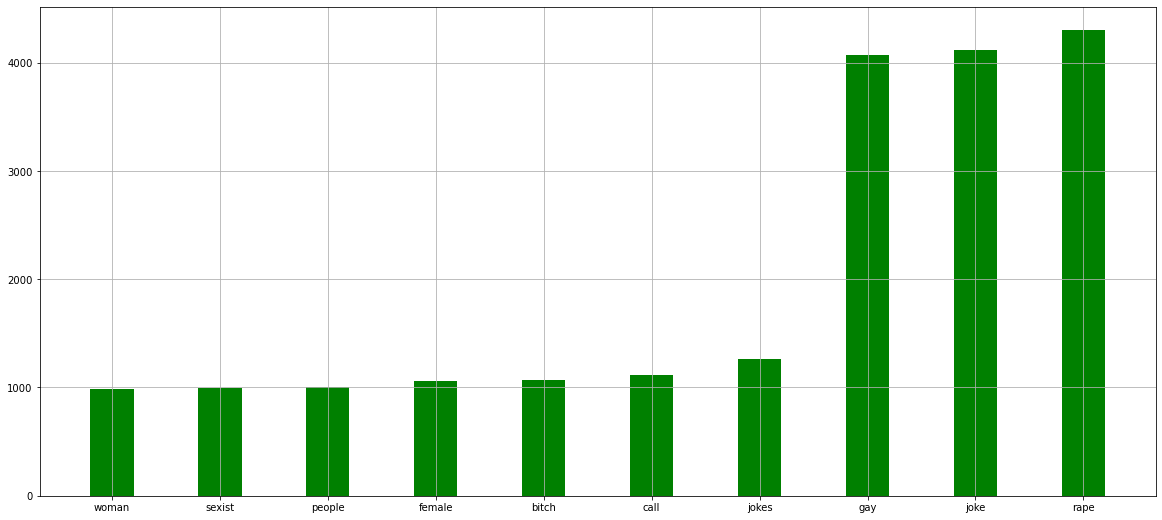

In [110]:
plt.figure(figsize = (20, 9))
plt.bar (key, value, color = 'green', width = 0.4)
plt.grid(True)
plt.show ()

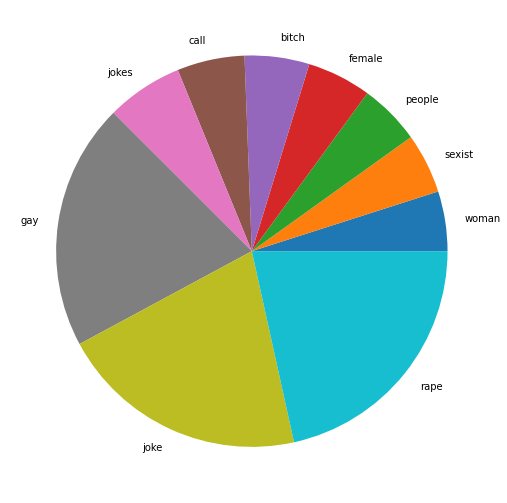

In [69]:
plt.figure (figsize = (20, 9))
plt.pie (value, labels = key)
plt.show ()

In [70]:
bigrams

[('rape joke', 1664),
 ('rape jokes', 601),
 ('gay joke', 550),
 ('gay rape', 464),
 ('joke rape', 373),
 ('joke gay', 361),
 ('gay jokes', 256),
 ('rape gay', 244),
 ('gay people', 231),
 ('call female', 227)]

In [72]:
bigram_key, bigram_value = [], []
for i in bigrams:
    for j in range (0, len (i)):
        if j == 0:
            bigram_key.append (i [j])
        elif j == 1:
            bigram_value.append (i [j])

In [73]:
bigram_key

['rape joke',
 'rape jokes',
 'gay joke',
 'gay rape',
 'joke rape',
 'joke gay',
 'gay jokes',
 'rape gay',
 'gay people',
 'call female']

In [74]:
bigram_value

[1664, 601, 550, 464, 373, 361, 256, 244, 231, 227]

In [75]:
bigram_dict = {}
for i in range (0, len (bigram_key)):
    bigram_dict [bigram_key [i]] = bigram_value [i]
bigram_dict

{'rape joke': 1664,
 'rape jokes': 601,
 'gay joke': 550,
 'gay rape': 464,
 'joke rape': 373,
 'joke gay': 361,
 'gay jokes': 256,
 'rape gay': 244,
 'gay people': 231,
 'call female': 227}

In [76]:
l = sorted(bigram_dict.items(), key =
             lambda kv:(kv[1], kv[0])) 

In [83]:
bigram_keys, bigram_values = [], []
for i in bigram_dict.keys ():
    bigram_keys.append (i)
for i in bigram_dict.values ():
    bigram_values.append (i)

bigram_keys.reverse ()
bigram_values.reverse ()

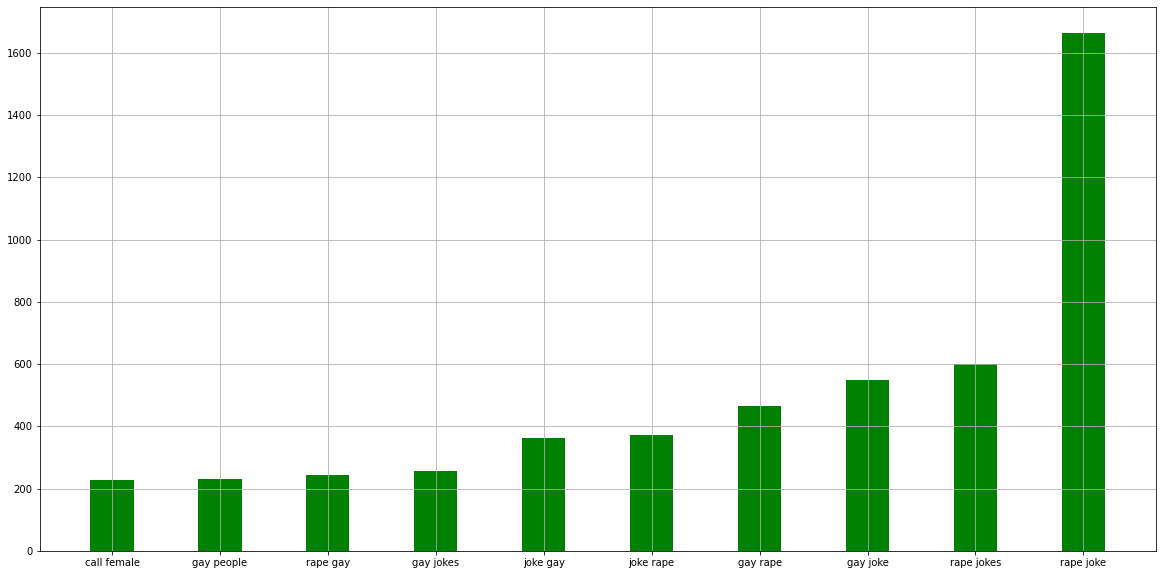

In [107]:
plt.figure (figsize = (20, 10))
plt.bar (bigram_keys, bigram_values, color = 'green', width = 0.4)
plt.grid (True)
plt.show ()

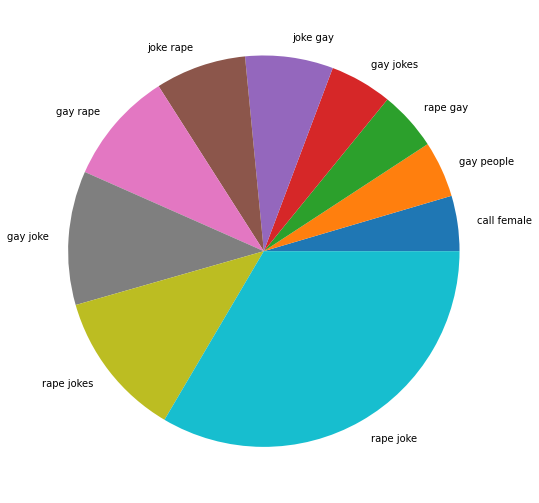

In [87]:
plt.figure (figsize = (20, 9))
plt.pie (bigram_values, labels = bigram_keys)
plt.show ()

# RELIGION BASED HATE

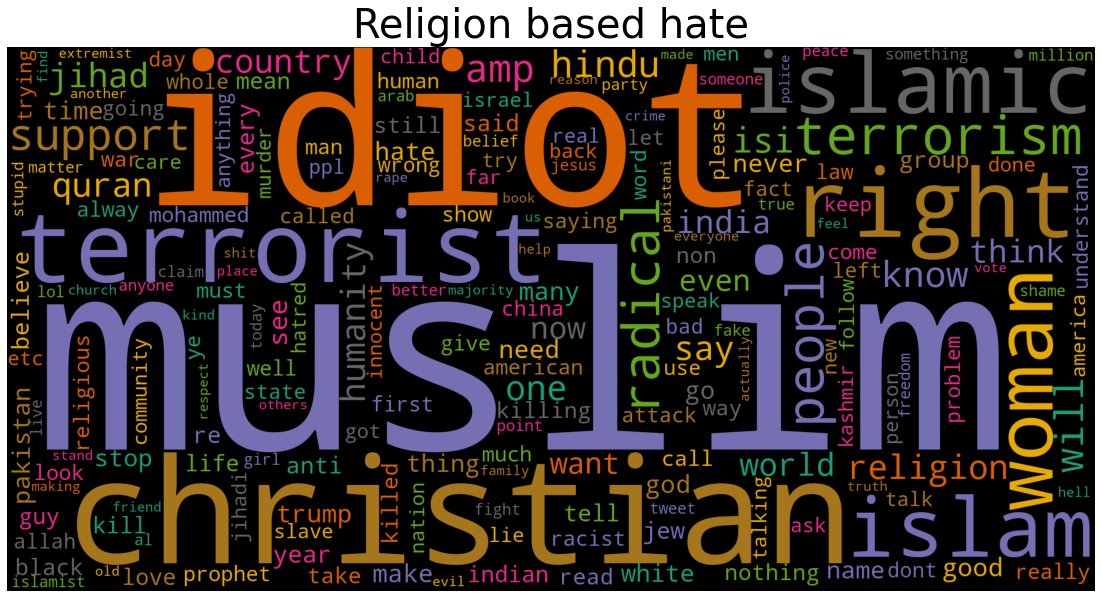

In [89]:
plt.figure(figsize=(20,10))
subset2 = df[df['cyberbullying_type']=='religion']
text_religion = subset2.tweet_text.values
cloud2=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_religion))

plt.axis('off')
plt.title("Religion based hate",fontsize=40)
plt.imshow(cloud2)

In [122]:
unigrams = get_top_n_gram(text_religion,(1,1),10)
bigrams = get_top_n_gram(text_religion,(2,2),10)
religion_1 = pd.DataFrame(unigrams, columns = ['Text' , 'count'])
religion_1.groupby('Text').sum()['count'].sort_values(ascending=True)
religion_2 = pd.DataFrame(bigrams, columns = ['Text' , 'count'])
religion_2.groupby('Text').sum()['count'].sort_values(ascending=True)

Text
right now             95
christian support     96
radical christian    107
good christian       108
muslim country       111
support radical      116
muslim idiot         121
radical islamic      212
christian woman      837
islamic terrorism    872
Name: count, dtype: int64

In [123]:
unigrams

[('muslim', 4242),
 ('idiot', 2779),
 ('christian', 1960),
 ('islamic', 1277),
 ('right', 1271),
 ('islam', 1237),
 ('terrorist', 1229),
 ('woman', 1185),
 ('terrorism', 1170),
 ('radical', 1094)]

In [124]:
religion1_unigram = []
religion2_unigram = []

for i in unigrams:
    for j in range (0, len (i)):
        if j == 0:
            religion1_unigram.append (i [j])
        elif j == 1:
            religion2_unigram.append (i [j])

In [125]:
religion1_unigram

['muslim',
 'idiot',
 'christian',
 'islamic',
 'right',
 'islam',
 'terrorist',
 'woman',
 'terrorism',
 'radical']

In [126]:
religion2_unigram

[4242, 2779, 1960, 1277, 1271, 1237, 1229, 1185, 1170, 1094]

In [127]:
unigram_dict = {}
for i in range (0, len (religion1_unigram)):
    unigram_dict [religion1_unigram [i]] = religion2_unigram [i]
unigram_dict

{'muslim': 4242,
 'idiot': 2779,
 'christian': 1960,
 'islamic': 1277,
 'right': 1271,
 'islam': 1237,
 'terrorist': 1229,
 'woman': 1185,
 'terrorism': 1170,
 'radical': 1094}

In [128]:
sortedUnigramReligion1 = sort_dict (unigram_dict)

In [129]:
sortedUnigramReligion1

[('radical', 1094),
 ('terrorism', 1170),
 ('woman', 1185),
 ('terrorist', 1229),
 ('islam', 1237),
 ('right', 1271),
 ('islamic', 1277),
 ('christian', 1960),
 ('idiot', 2779),
 ('muslim', 4242)]

In [130]:
religion1_unigram, religion2_unigram = [], []
religion1_unigram, religion2_unigram = multiple_list (sortedUnigramReligion1)

In [131]:
religion1_unigram

['radical',
 'terrorism',
 'woman',
 'terrorist',
 'islam',
 'right',
 'islamic',
 'christian',
 'idiot',
 'muslim']

In [132]:
religion2_unigram

[1094, 1170, 1185, 1229, 1237, 1271, 1277, 1960, 2779, 4242]

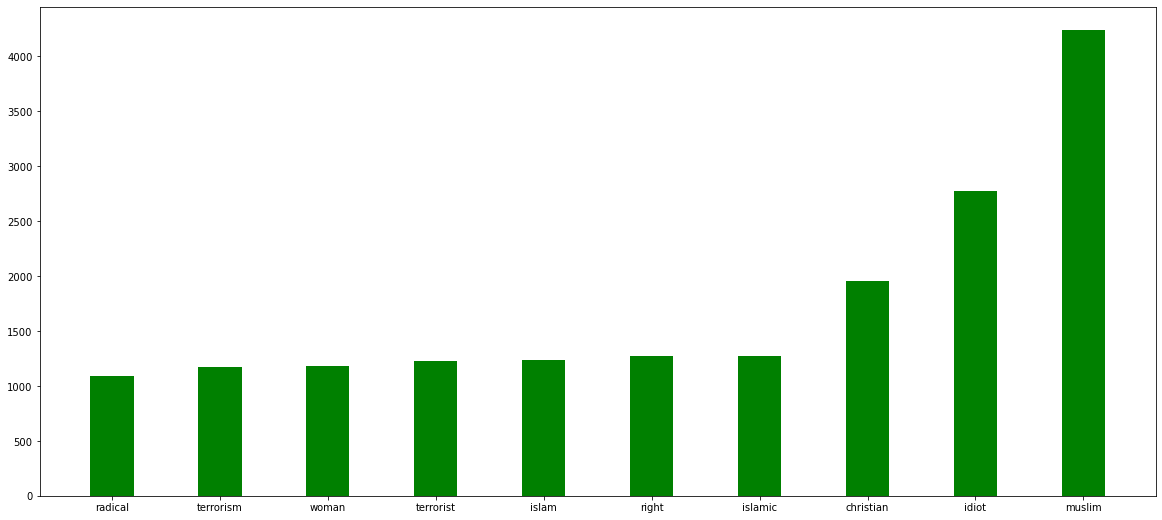

In [133]:
plt.figure (figsize = (20, 9))
plt.bar (religion1_unigram, religion2_unigram, color = 'green', width = 0.4)
plt.show ()

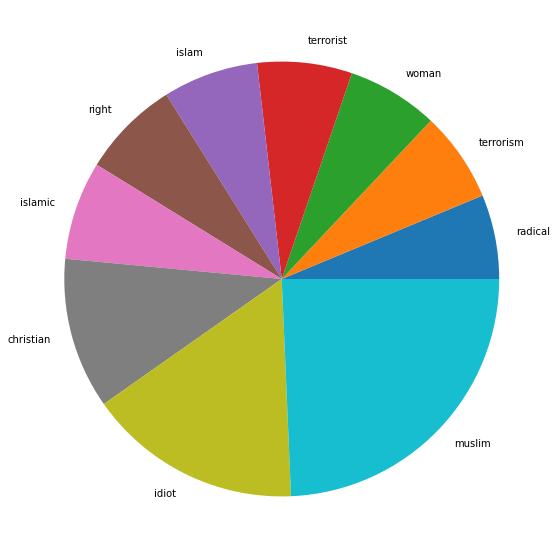

In [134]:
plt.figure (figsize = (20, 10))
plt.pie (religion2_unigram, labels = religion1_unigram)
plt.show ()

In [135]:
bigrams

[('islamic terrorism', 872),
 ('christian woman', 837),
 ('radical islamic', 212),
 ('muslim idiot', 121),
 ('support radical', 116),
 ('muslim country', 111),
 ('good christian', 108),
 ('radical christian', 107),
 ('christian support', 96),
 ('right now', 95)]

In [138]:
bigram_dictionary = {}
for i in bigrams: bigram_dictionary [i [0]] = i[1]
bigram_dictionary

{'islamic terrorism': 872,
 'christian woman': 837,
 'radical islamic': 212,
 'muslim idiot': 121,
 'support radical': 116,
 'muslim country': 111,
 'good christian': 108,
 'radical christian': 107,
 'christian support': 96,
 'right now': 95}

In [140]:
religion_bigram_dict = sort_dict (bigram_dictionary)
religion_bigram_dict

[('right now', 95),
 ('christian support', 96),
 ('radical christian', 107),
 ('good christian', 108),
 ('muslim country', 111),
 ('support radical', 116),
 ('muslim idiot', 121),
 ('radical islamic', 212),
 ('christian woman', 837),
 ('islamic terrorism', 872)]

In [142]:
religion1_bigram, religion2_bigram = multiple_list (religion_bigram_dict)

In [143]:
religion1_bigram

['right now',
 'christian support',
 'radical christian',
 'good christian',
 'muslim country',
 'support radical',
 'muslim idiot',
 'radical islamic',
 'christian woman',
 'islamic terrorism']

In [144]:
religion2_bigram

[95, 96, 107, 108, 111, 116, 121, 212, 837, 872]

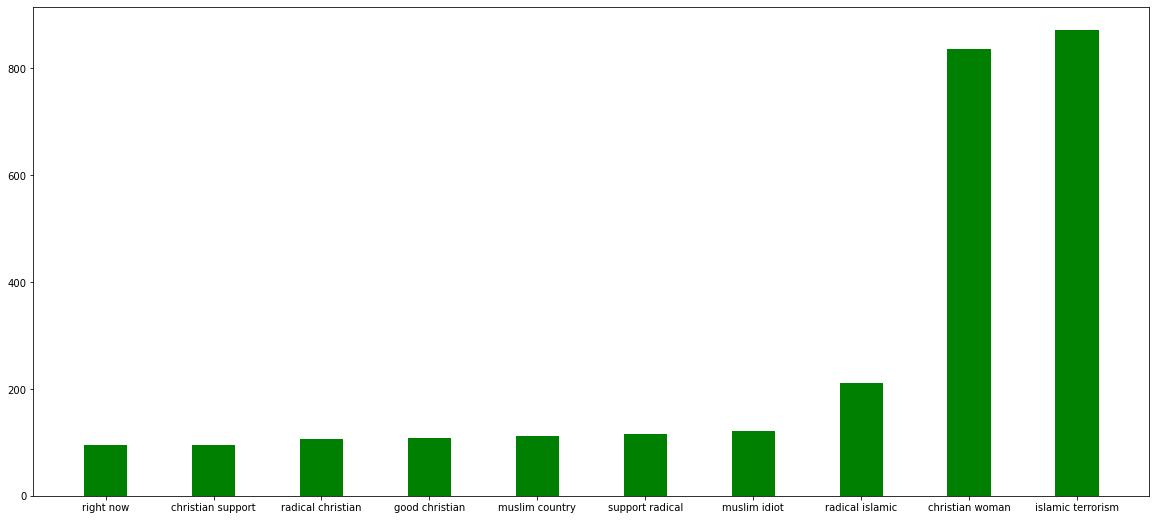

In [145]:
plt.figure (figsize = (20, 9))
plt.bar (religion1_bigram, religion2_bigram, color = 'green', width = 0.4)
plt.show ()

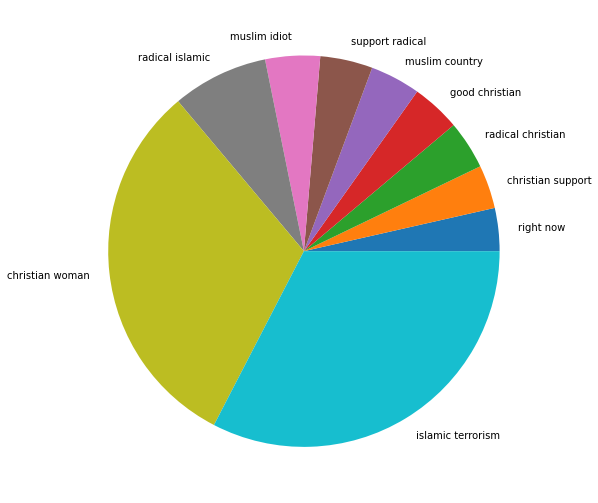

In [146]:
plt.figure (figsize = (20, 9))
plt.pie (religion2_bigram, labels = religion1_bigram)
plt.show ()

# AGE BASED HATE

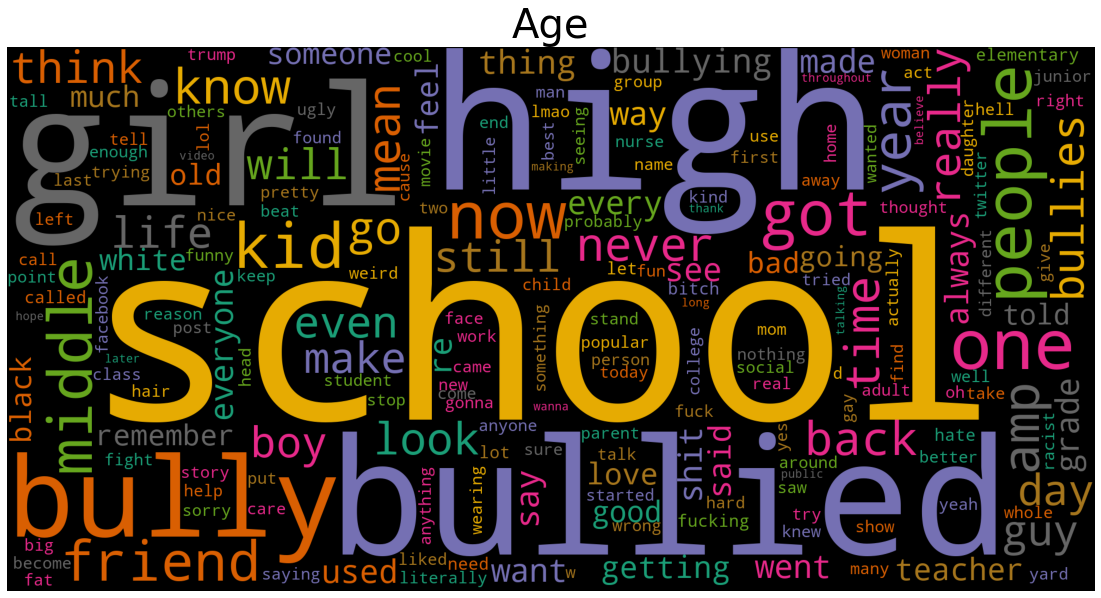

In [147]:
plt.figure(figsize=(20,10))
subset3 = df[df['cyberbullying_type']=='age']
text_age = subset3.tweet_text.values
cloud3=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_age))

plt.axis('off')
plt.title("Age",fontsize=40)
plt.imshow(cloud3)

[('muslim', 4242),
 ('idiot', 2779),
 ('christian', 1960),
 ('islamic', 1277),
 ('right', 1271),
 ('islam', 1237),
 ('terrorist', 1229),
 ('woman', 1185),
 ('terrorism', 1170),
 ('radical', 1094)]

In [150]:
unigrams = get_top_n_gram(text_age,(1,1),10)
bigrams = get_top_n_gram(text_age,(2,2),10)

age_1 = pd.DataFrame(unigrams, columns = ['Text' , 'count'])
age_1.groupby('Text').sum()['count'].sort_values(ascending=True)
age_2 = pd.DataFrame(bigrams, columns = ['Text' , 'count'])
age_2.groupby('Text').sum()['count'].sort_values(ascending=True)

Text
school girl        228
school bullied     242
bully school       360
got bullied        375
girl high          417
middle school      603
school bully      1130
bullied high      1352
girl bullied      1468
high school       4661
Name: count, dtype: int64

In [153]:
unigrams

[('school', 8549),
 ('high', 5086),
 ('girl', 4488),
 ('bullied', 4393),
 ('bully', 3996),
 ('one', 1037),
 ('people', 936),
 ('now', 913),
 ('got', 827),
 ('middle', 788)]

In [154]:
bully_dict = {}
for i in unigrams:
    bully_dict [i [0]] = i [1]
bully_dict
    

{'school': 8549,
 'high': 5086,
 'girl': 4488,
 'bullied': 4393,
 'bully': 3996,
 'one': 1037,
 'people': 936,
 'now': 913,
 'got': 827,
 'middle': 788}

In [155]:
bully_dict = sort_dict (bully_dict)

In [156]:
bully_dict

[('middle', 788),
 ('got', 827),
 ('now', 913),
 ('people', 936),
 ('one', 1037),
 ('bully', 3996),
 ('bullied', 4393),
 ('girl', 4488),
 ('high', 5086),
 ('school', 8549)]

In [157]:
bully_unigram1, bully_unigram2 = multiple_list (bully_dict)

In [159]:
bully_unigram1

['middle',
 'got',
 'now',
 'people',
 'one',
 'bully',
 'bullied',
 'girl',
 'high',
 'school']

In [160]:
bully_unigram2

[788, 827, 913, 936, 1037, 3996, 4393, 4488, 5086, 8549]

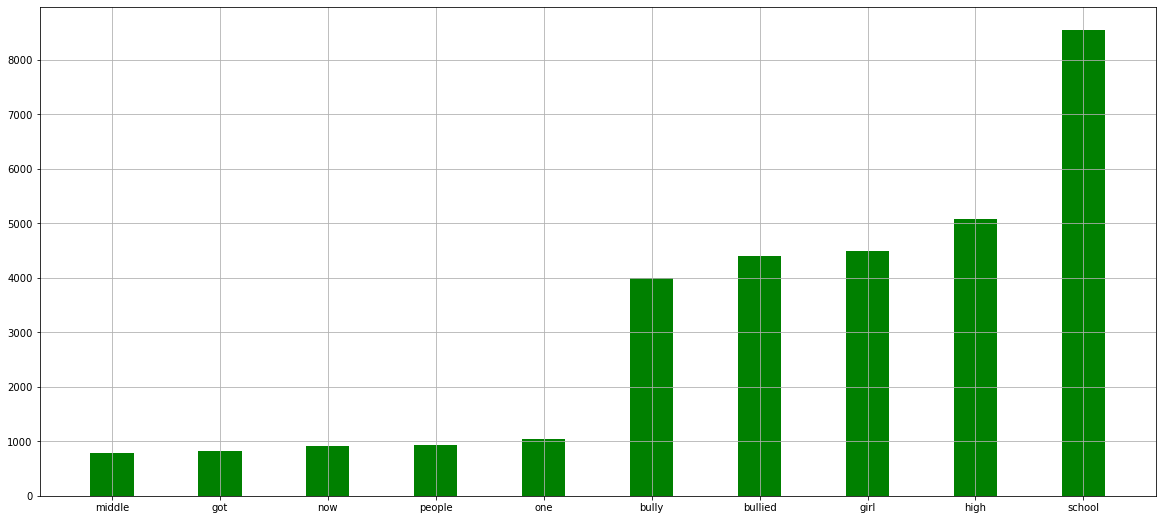

In [174]:
plt.figure (figsize = (20, 9))
plt.bar (bully_unigram1, bully_unigram2, color = 'green', width = 0.4)
plt.grid (True)
plt.show ()

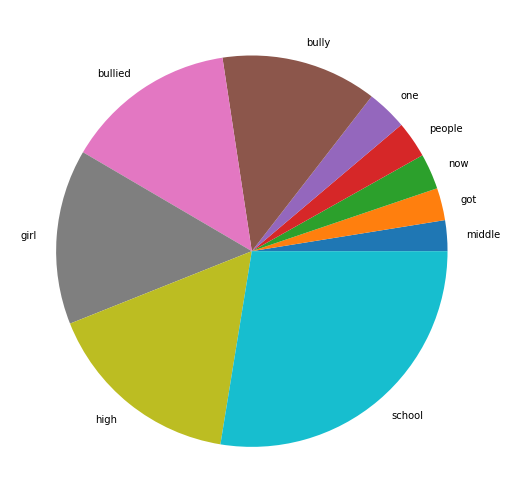

In [162]:
plt.figure (figsize = (20, 9))
plt.pie (bully_unigram2, labels = bully_unigram1)
plt.show ()

In [163]:
bigrams

[('high school', 4661),
 ('girl bullied', 1468),
 ('bullied high', 1352),
 ('school bully', 1130),
 ('middle school', 603),
 ('girl high', 417),
 ('got bullied', 375),
 ('bully school', 360),
 ('school bullied', 242),
 ('school girl', 228)]

In [168]:
age_bigram_dict = {}
for i in bigrams:
    age_bigram_dict [i [0]] = i [1]
age_bigram_dict

{'high school': 4661,
 'girl bullied': 1468,
 'bullied high': 1352,
 'school bully': 1130,
 'middle school': 603,
 'girl high': 417,
 'got bullied': 375,
 'bully school': 360,
 'school bullied': 242,
 'school girl': 228}

In [169]:
age_bigram_list = sort_dict (age_bigram_dict)

In [170]:
age_bigram_list

[('school girl', 228),
 ('school bullied', 242),
 ('bully school', 360),
 ('got bullied', 375),
 ('girl high', 417),
 ('middle school', 603),
 ('school bully', 1130),
 ('bullied high', 1352),
 ('girl bullied', 1468),
 ('high school', 4661)]

In [171]:
age_bg1, age_bg2 = multiple_list (age_bigram_list)

In [172]:
age_bg1

['school girl',
 'school bullied',
 'bully school',
 'got bullied',
 'girl high',
 'middle school',
 'school bully',
 'bullied high',
 'girl bullied',
 'high school']

In [173]:
age_bg2

[228, 242, 360, 375, 417, 603, 1130, 1352, 1468, 4661]

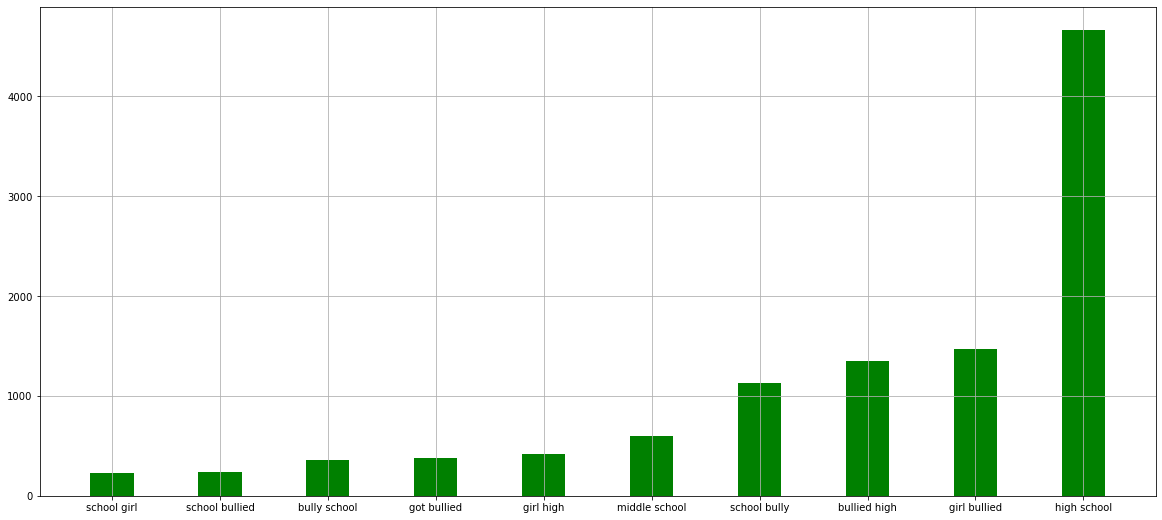

In [175]:
plt.figure (figsize = (20, 9))
plt.bar (age_bg1, age_bg2, color = 'green', width = 0.4)
plt.grid (True)
plt.show ()

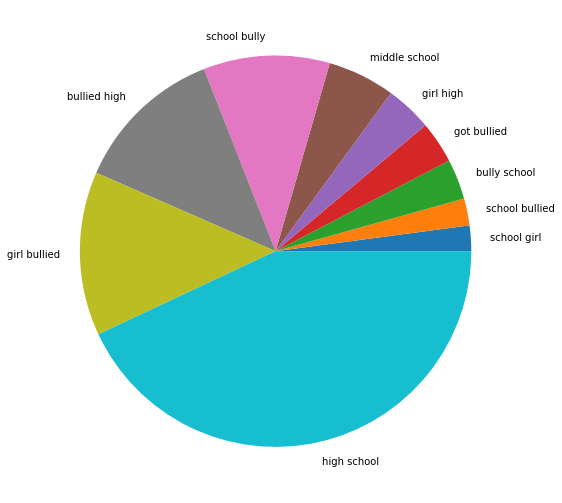

In [176]:
plt.figure (figsize = (20, 9))
plt.pie (age_bg2, labels = age_bg1)
plt.grid (True)
plt.show ()

# ETHINICITY - BASED HATER ON TWITTER

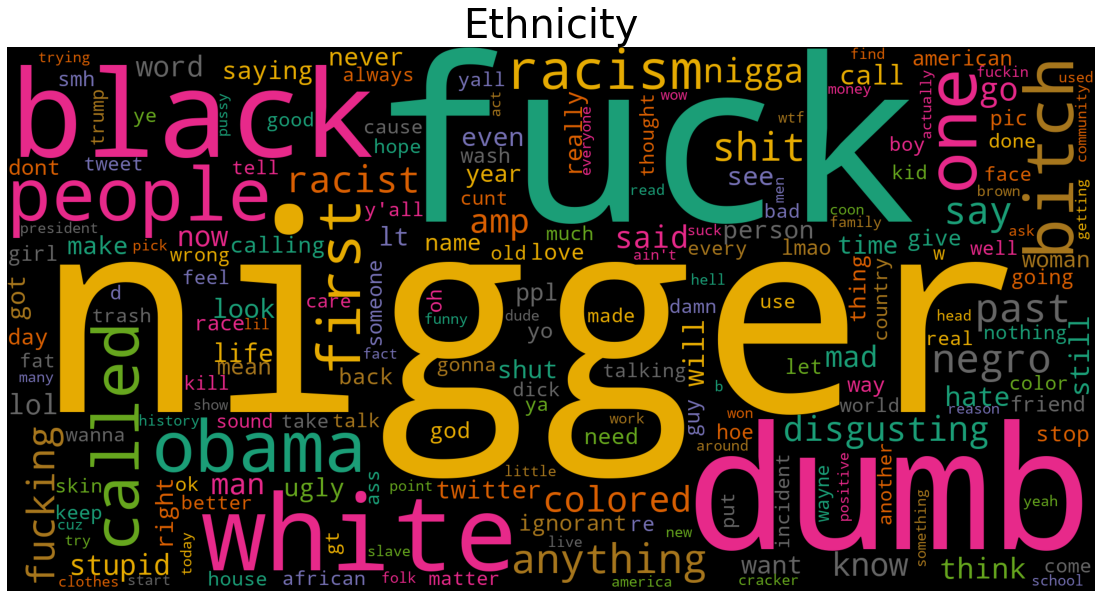

In [177]:
plt.figure(figsize=(20,10))
subset4 = df[df['cyberbullying_type']=='ethnicity']
text_ethnicity = subset4.tweet_text.values
cloud4=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_ethnicity))

plt.axis('off')
plt.title("Ethnicity",fontsize=40)
plt.imshow(cloud4)

In [178]:
unigrams = get_top_n_gram(text_ethnicity,(1,1),10)
bigrams = get_top_n_gram(text_ethnicity,(2,2),10)

ethnicity_1 = pd.DataFrame(unigrams, columns = ['Text' , 'count'])
ethnicity_1.groupby('Text').sum()['count'].sort_values(ascending=True)
ethnicity_2 = pd.DataFrame(bigrams, columns = ['Text' , 'count'])
ethnicity_2.groupby('Text').sum()['count'].sort_values(ascending=True)

Text
white people     246
nigger dumb      254
nigger fuck      261
fuck nigger      310
black people     356
fuck dumb        707
obama dumb       985
fuck obama      1001
dumb fuck       1038
dumb nigger     2337
Name: count, dtype: int64

In [179]:
unigrams

[('nigger', 5426),
 ('fuck', 5400),
 ('dumb', 5214),
 ('black', 2175),
 ('white', 1587),
 ('people', 1193),
 ('obama', 1145),
 ('one', 1035),
 ('bitch', 1017),
 ('called', 905)]

In [180]:
ethinicity_unigrams = {}
for i in unigrams:
    ethinicity_unigrams [i [0]] = i [1]
ethinicity_unigrams

{'nigger': 5426,
 'fuck': 5400,
 'dumb': 5214,
 'black': 2175,
 'white': 1587,
 'people': 1193,
 'obama': 1145,
 'one': 1035,
 'bitch': 1017,
 'called': 905}

In [181]:
ethinicity_list = sort_dict (ethinicity_unigrams)

In [182]:
ethinicity_list

[('called', 905),
 ('bitch', 1017),
 ('one', 1035),
 ('obama', 1145),
 ('people', 1193),
 ('white', 1587),
 ('black', 2175),
 ('dumb', 5214),
 ('fuck', 5400),
 ('nigger', 5426)]

In [183]:
eth1, eth2 = multiple_list (ethinicity_list)

In [184]:
eth1

['called',
 'bitch',
 'one',
 'obama',
 'people',
 'white',
 'black',
 'dumb',
 'fuck',
 'nigger']

In [185]:
eth2

[905, 1017, 1035, 1145, 1193, 1587, 2175, 5214, 5400, 5426]

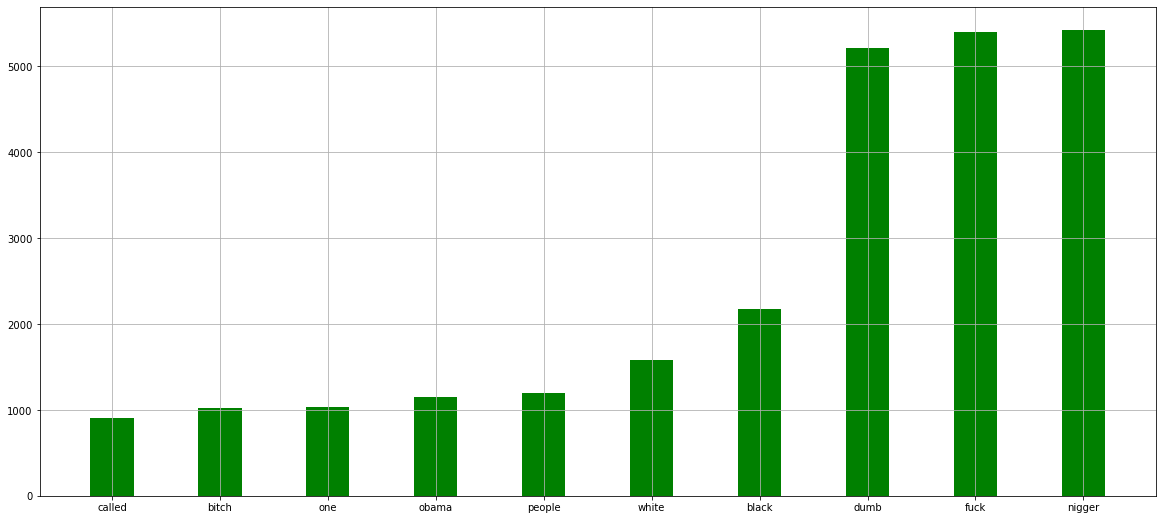

In [200]:
plt.figure (figsize = (20, 9))
plt.bar (eth1, eth2, color = 'green', width = 0.4)
plt.grid (True)
plt.show ()

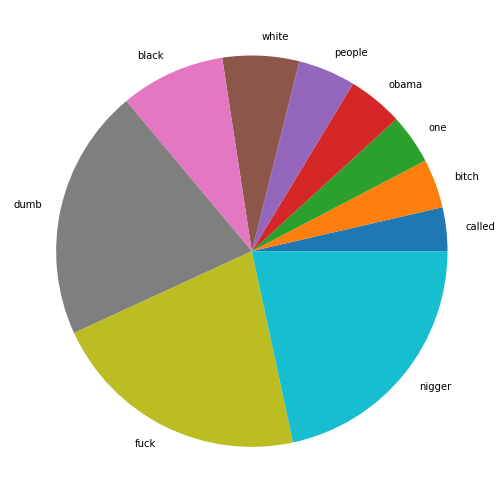

In [187]:
plt.figure (figsize = (20, 9))
plt.pie (eth2, labels = eth1)
plt.show ()

In [189]:
ethinicity_bigrams = {}
for i in bigrams:
    ethinicity_bigrams [i [0]] = i [1]
ethinicity_bigrams

{'dumb nigger': 2337,
 'dumb fuck': 1038,
 'fuck obama': 1001,
 'obama dumb': 985,
 'fuck dumb': 707,
 'black people': 356,
 'fuck nigger': 310,
 'nigger fuck': 261,
 'nigger dumb': 254,
 'white people': 246}

In [190]:
ethinicity_bigrams_list = sort_dict (ethinicity_bigrams)

In [191]:
ethinicity_bigrams_list

[('white people', 246),
 ('nigger dumb', 254),
 ('nigger fuck', 261),
 ('fuck nigger', 310),
 ('black people', 356),
 ('fuck dumb', 707),
 ('obama dumb', 985),
 ('fuck obama', 1001),
 ('dumb fuck', 1038),
 ('dumb nigger', 2337)]

In [192]:
ethb1, ethb2 = multiple_list (ethinicity_bigrams_list)

In [193]:
ethb1

['white people',
 'nigger dumb',
 'nigger fuck',
 'fuck nigger',
 'black people',
 'fuck dumb',
 'obama dumb',
 'fuck obama',
 'dumb fuck',
 'dumb nigger']

In [194]:
ethb2

[246, 254, 261, 310, 356, 707, 985, 1001, 1038, 2337]

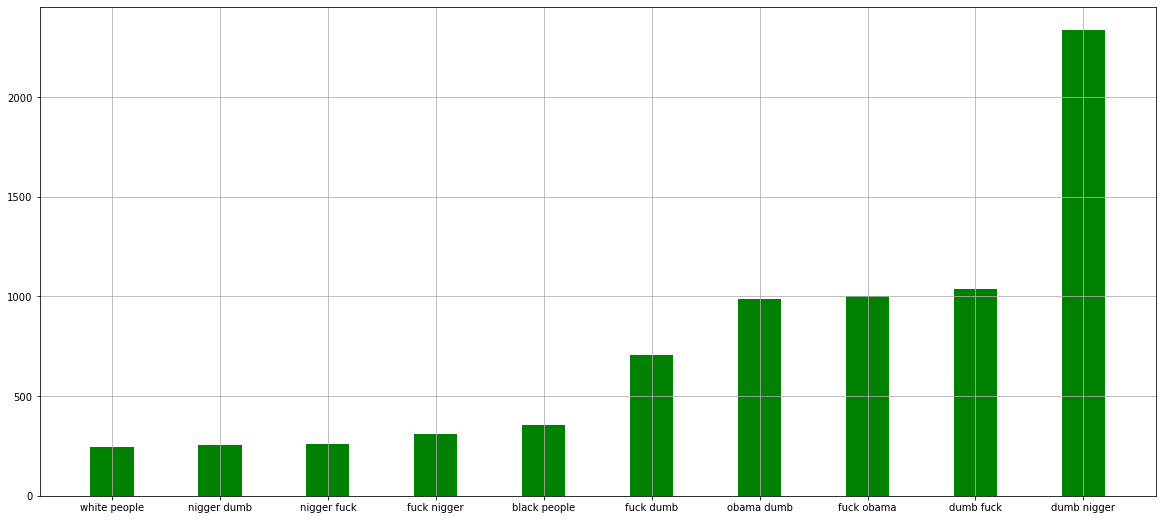

In [199]:
plt.figure (figsize = (20, 9))
plt.bar (ethb1, ethb2, color = 'green', width = 0.4)
plt.grid(True)
plt.show ()

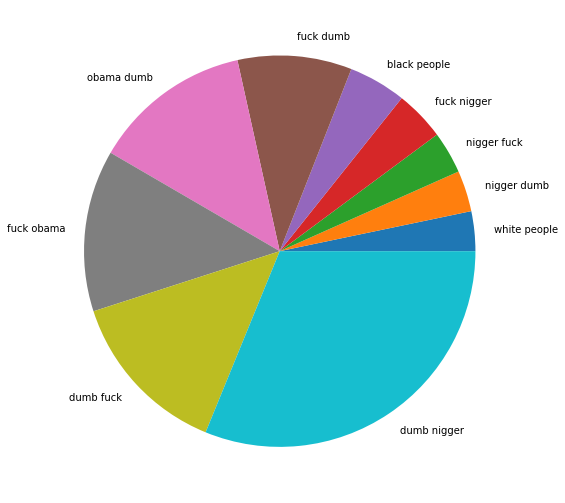

In [198]:
plt.figure (figsize = (20, 9))
plt.pie (ethb2, labels = ethb1)
plt.show ()

# MOST USED WORDS BY HATERS ON TWITTER

In [202]:
unigrams = get_top_n_gram(text_ethnicity,(1,1),10)
bigrams = get_top_n_gram(text_ethnicity,(2,2),10)

ethnicity_1 = pd.DataFrame(unigrams, columns = ['Text' , 'count'])
ethnicity_1.groupby('Text').sum()['count'].sort_values(ascending=True)

ethnicity_2 = pd.DataFrame(bigrams, columns = ['Text' , 'count'])
ethnicity_2.groupby('Text').sum()['count'].sort_values(ascending=True)

Text
white people     246
nigger dumb      254
nigger fuck      261
fuck nigger      310
black people     356
fuck dumb        707
obama dumb       985
fuck obama      1001
dumb fuck       1038
dumb nigger     2337
Name: count, dtype: int64

In [203]:
msw1_dict = {}
for i in unigrams:
    msw1_dict [i [0]] = i [1]
msw1_dict

{'nigger': 5426,
 'fuck': 5400,
 'dumb': 5214,
 'black': 2175,
 'white': 1587,
 'people': 1193,
 'obama': 1145,
 'one': 1035,
 'bitch': 1017,
 'called': 905}

In [204]:
msw1_list = sort_dict (msw1_dict)

In [206]:
msw1_list

[('called', 905),
 ('bitch', 1017),
 ('one', 1035),
 ('obama', 1145),
 ('people', 1193),
 ('white', 1587),
 ('black', 2175),
 ('dumb', 5214),
 ('fuck', 5400),
 ('nigger', 5426)]

In [207]:
msw_list1, msw_list2 = multiple_list (msw1_list)

In [208]:
msw_list1

['called',
 'bitch',
 'one',
 'obama',
 'people',
 'white',
 'black',
 'dumb',
 'fuck',
 'nigger']

In [209]:
msw_list2

[905, 1017, 1035, 1145, 1193, 1587, 2175, 5214, 5400, 5426]

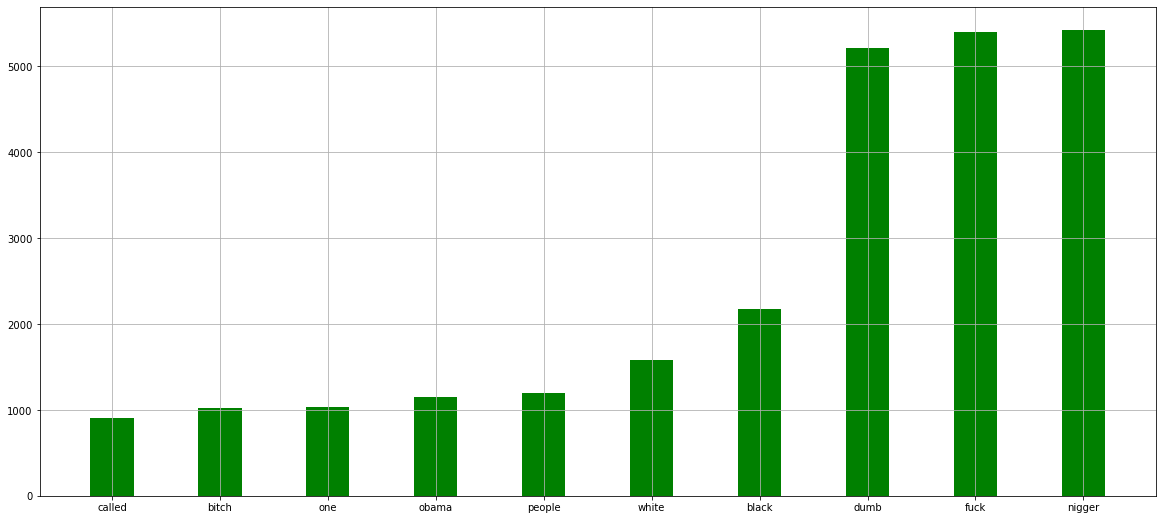

In [210]:
plt.figure (figsize = (20, 9))
plt.bar (msw_list1, msw_list2, color = 'green', width = 0.4)
plt.grid (True)
plt.show ()

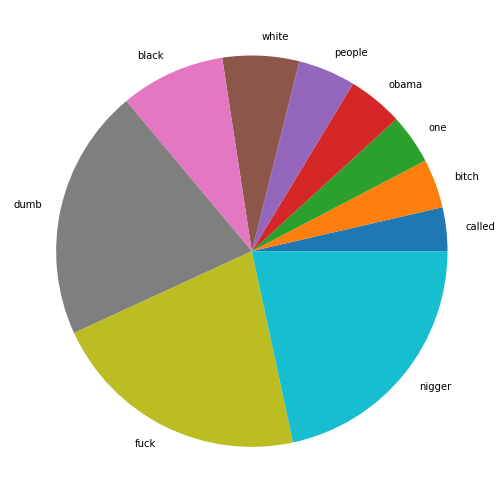

In [211]:
plt.figure (figsize = (20, 9))
plt.pie (msw_list2, labels = msw_list1)
plt.show ()

In [212]:
msw_bigrams = {}
bigrams

[('dumb nigger', 2337),
 ('dumb fuck', 1038),
 ('fuck obama', 1001),
 ('obama dumb', 985),
 ('fuck dumb', 707),
 ('black people', 356),
 ('fuck nigger', 310),
 ('nigger fuck', 261),
 ('nigger dumb', 254),
 ('white people', 246)]

In [213]:
for i in bigrams:
    msw_bigrams [i [0]] = i [1]
msw_bigrams = sort_dict (msw_bigrams)

In [214]:
msw_bigrams

[('white people', 246),
 ('nigger dumb', 254),
 ('nigger fuck', 261),
 ('fuck nigger', 310),
 ('black people', 356),
 ('fuck dumb', 707),
 ('obama dumb', 985),
 ('fuck obama', 1001),
 ('dumb fuck', 1038),
 ('dumb nigger', 2337)]

In [216]:
msw1, msw2 = multiple_list (msw_bigrams)

In [217]:
msw1

['white people',
 'nigger dumb',
 'nigger fuck',
 'fuck nigger',
 'black people',
 'fuck dumb',
 'obama dumb',
 'fuck obama',
 'dumb fuck',
 'dumb nigger']

In [218]:
msw2

[246, 254, 261, 310, 356, 707, 985, 1001, 1038, 2337]

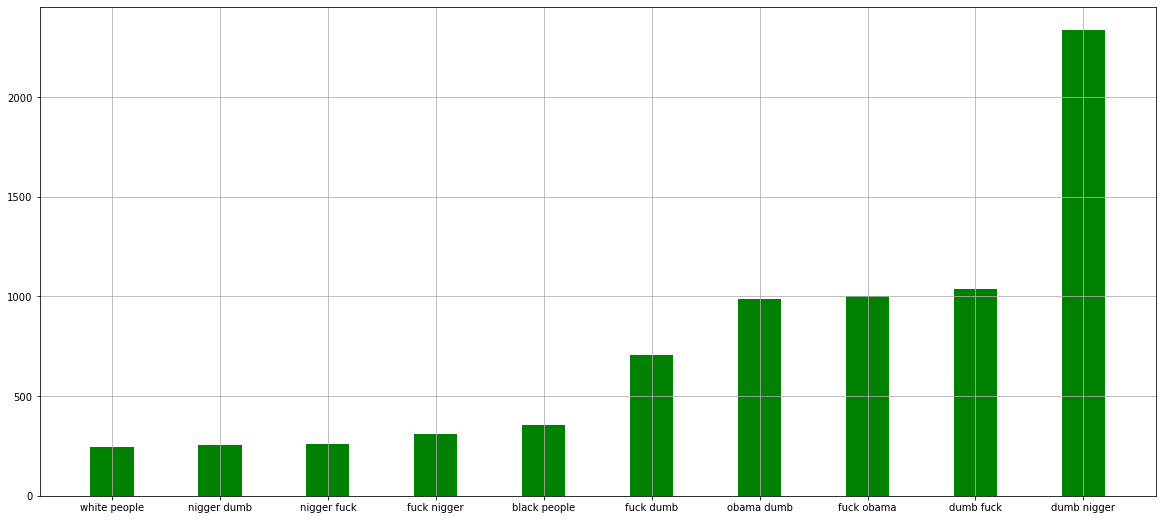

In [219]:
plt.figure (figsize = (20, 9))
plt.bar (msw1, msw2, color = 'green', width = 0.4)
plt.grid (True)
plt.show ()

# OTHER HATE ON TWITTER

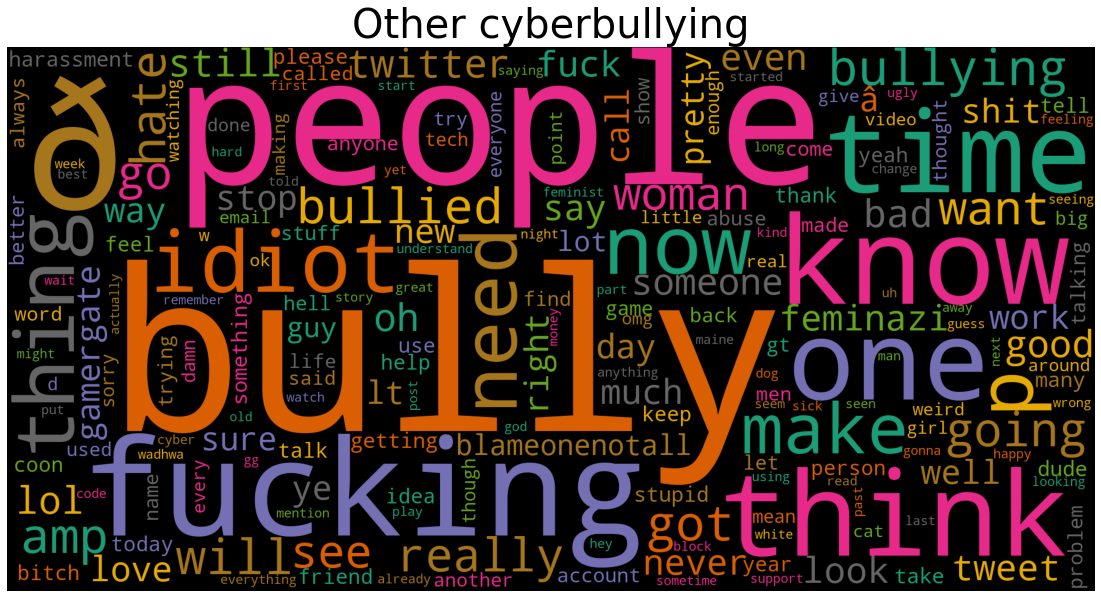

In [220]:
plt.figure(figsize=(20,10))
subset5 = df[df['cyberbullying_type']=='other_cyberbullying']
text_other = subset5.tweet_text.values
cloud5=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_other))

plt.axis('off')
plt.title("Other cyberbullying",fontsize=40)
plt.imshow(cloud5)

In [221]:
unigrams = get_top_n_gram(text_other,(1,1),10)
bigrams = get_top_n_gram(text_other,(2,2),10)

other_1 = pd.DataFrame(unigrams, columns = ['Text' , 'count'])
other_1.groupby('Text').sum()['count'].sort_values(ascending=True)

other_2 = pd.DataFrame(bigrams, columns = ['Text' , 'count'])
other_2.groupby('Text').sum()['count'].sort_values(ascending=True)

Text
woman tech       22
cyber bully      23
got bullied      23
bully lol        24
gt gt            25
oh god           25
maine coon       28
stop bullying    28
fucking hate     31
right now        44
Name: count, dtype: int64

In [222]:
unigrams

[('bully', 562),
 ('people', 429),
 ('fucking', 370),
 ('know', 304),
 ('think', 278),
 ('one', 256),
 ('idiot', 256),
 ('time', 245),
 ('now', 235),
 ('need', 208)]

In [223]:
ohu = {}
for i in unigrams:
    ohu [i [0]] = i [1]
ohu

{'bully': 562,
 'people': 429,
 'fucking': 370,
 'know': 304,
 'think': 278,
 'one': 256,
 'idiot': 256,
 'time': 245,
 'now': 235,
 'need': 208}

In [224]:
ohu = sort_dict (ohu)

In [225]:
ohu

[('need', 208),
 ('now', 235),
 ('time', 245),
 ('idiot', 256),
 ('one', 256),
 ('think', 278),
 ('know', 304),
 ('fucking', 370),
 ('people', 429),
 ('bully', 562)]

In [226]:
ohul1, ohul2 = multiple_list (ohu)

In [227]:
ohul1

['need',
 'now',
 'time',
 'idiot',
 'one',
 'think',
 'know',
 'fucking',
 'people',
 'bully']

In [228]:
ohul2

[208, 235, 245, 256, 256, 278, 304, 370, 429, 562]

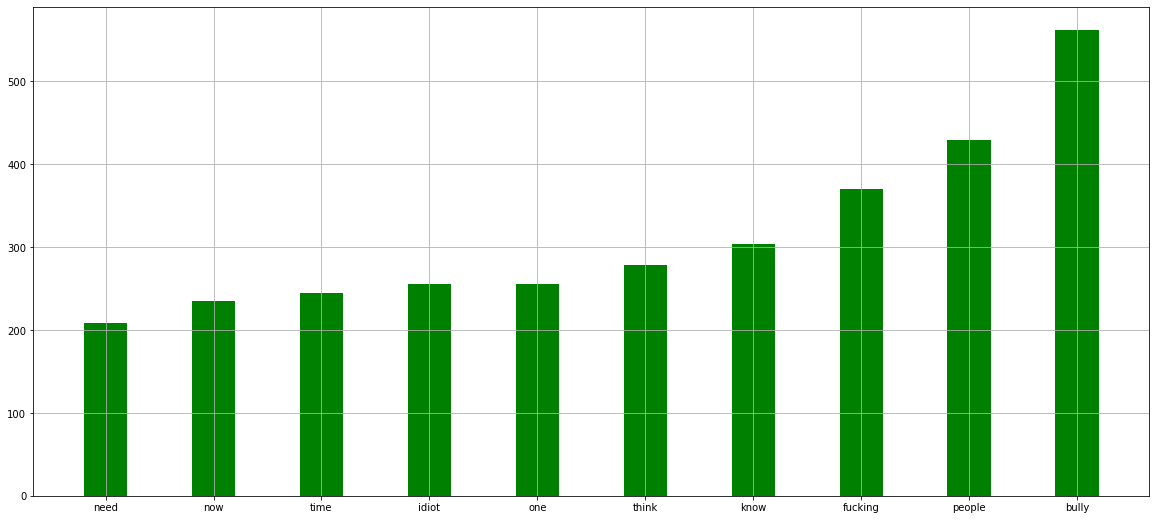

In [229]:
plt.figure (figsize = (20, 9))
plt.bar (ohul1, ohul2, color = 'green', width = 0.4)
plt.grid (True)
plt.show ()

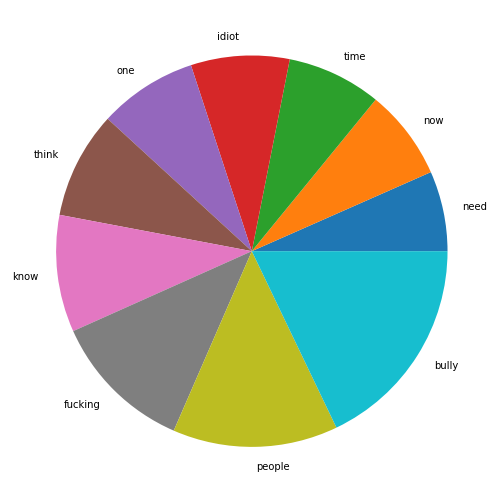

In [230]:
plt.figure (figsize = (20, 9))
plt.pie (ohul2, labels = ohul1)
plt.show ()